In [40]:
from astropy.io import fits
from pathlib import Path

fits_file = Path.home() / "desktop/jw01939-o001_t001_nircam_clear-f212n_i2d.fits"

# Open FITS file
hdul = fits.open(fits_file)
hdul.info()

Filename: /Users/vinland/desktop/jw01939-o001_t001_nircam_clear-f212n_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     376   ()      
  1  SCI           1 ImageHDU        75   (4679, 10073)   float32   
  2  ERR           1 ImageHDU        10   (4679, 10073)   float32   
  3  CON           1 ImageHDU        10   (4679, 10073, 3)   int32   
  4  WHT           1 ImageHDU         9   (4679, 10073)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (4679, 10073)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (4679, 10073)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (4679, 10073)   float32   
  8  HDRTAB        1 BinTableHDU    840   96R x 415C   [23A, 5A, 3A, 45A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 19A, 16A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 2A, L, 14A, 6A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 6A, 15A, 5A, D, D, D, D, D, D, 27A, D, D, D, 6A, 5A, 1A,

Set DATE-AVG to '2022-09-19T15:45:01.996' from MJD-AVG.
Set DATE-END to '2022-09-19T16:03:44.077' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to     1.291390 from OBSGEO-[XYZ].
Set OBSGEO-H to 1307149085.107 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


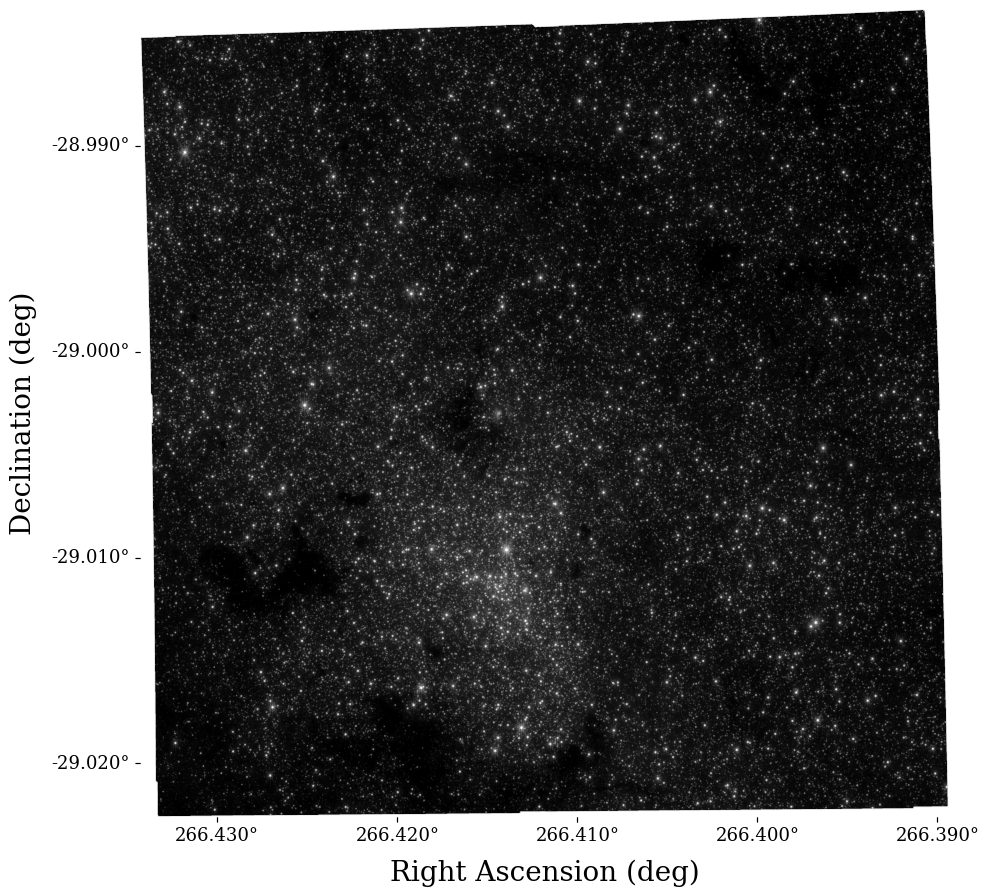

In [138]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, ZScaleInterval, LogStretch
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

plt.rcParams["font.family"] = "serif" 
plt.rcParams["mathtext.fontset"] = "cm" 

with fits.open(fits_file, memmap=True) as hdul:
    data = np.nan_to_num(hdul['SCI'].data, nan=0.0, posinf=0.0, neginf=0.0)
    wcs  = WCS(hdul['SCI'].header, hdul).celestial

good = np.isfinite(data) * (data > 0) 
vmin, vmax = np.percentile(data[good], (20, 85)) 
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# NRCB half 
y_split = data.shape[0] // 2 + 530
data = data[y_split:, :-160]
wcs = wcs.slice((slice(y_split, None), slice(None)))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(data, origin='lower', cmap='gist_gray', norm=norm)

lon, lat = ax.coords
lon.set_format_unit(u.deg)
lat.set_format_unit(u.deg)
lon.set_major_formatter('d.ddd')
lat.set_major_formatter('d.ddd')
lon.set_ticklabel(size=13)
lat.set_ticklabel(size=13)
lon.set_ticks_position('b')
lat.set_ticks_position('l')
lon.set_ticklabel_position('b')
lat.set_ticklabel_position('l')

ax.set_xlabel('Right Ascension (deg)', fontsize=20)
ax.set_ylabel('Declination (deg)', fontsize=20)

ax.coords.frame.set_linewidth(0)

plt.tight_layout()
plt.show()